# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.147790e+01     6.839275e+00
 * time: 0.004988908767700195
     1     2.862873e+01     5.336004e+00
 * time: 0.014333009719848633
     2     2.621680e+01     1.244922e+01
 * time: 0.03754687309265137
     3     1.760537e+01     4.598421e+00
 * time: 0.06587481498718262
     4     1.202575e+01     1.672034e+00
 * time: 0.09464597702026367
     5     1.051011e+01     1.139455e+00
 * time: 0.11752581596374512
     6     1.005469e+01     2.109699e+00
 * time: 0.13585901260375977
     7     9.657201e+00     9.652082e-01
 * time: 0.1560678482055664
     8     9.338961e+00     7.793275e-01
 * time: 0.17467093467712402
     9     9.160625e+00     9.013908e-01
 * time: 0.1932368278503418
    10     8.947428e+00     5.637349e-01
 * time: 0.21170783042907715
    11     8.827321e+00     4.553665e-01
 * time: 0.230118989944458
    12     8.793718e+00     5.689537e-01
 * time: 0.24408888816833496
    13     8.753089e+00     4.761020e-01
 * time: 0

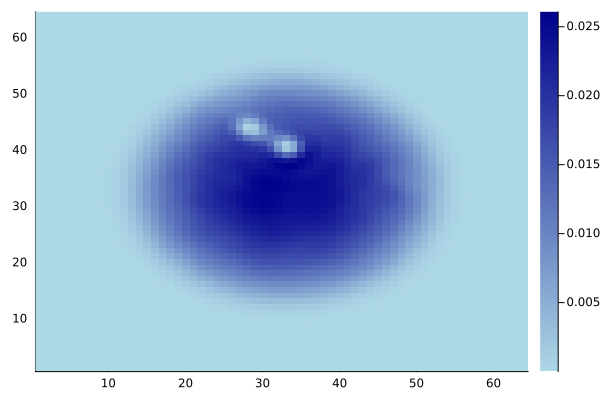

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)